<a href="https://colab.research.google.com/github/TheKeiser/ai-ml-principles-exercises/blob/main/ML-training/digit_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import sklearn
import numpy as np

In [103]:
import sklearn.datasets as datasets

In [104]:
data = datasets.load_digits()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
(data.images[0] / 16 * 255).astype(np.uint8) #delar med 16 och multiplicerar med 255 för att få från 0-255 istället (för 0-16) och gör om till uint8 typ

array([[  0,   0,  79, 207, 143,  15,   0,   0],
       [  0,   0, 207, 239, 159, 239,  79,   0],
       [  0,  47, 239,  31,   0, 175, 127,   0],
       [  0,  63, 191,   0,   0, 127, 127,   0],
       [  0,  79, 127,   0,   0, 143, 127,   0],
       [  0,  63, 175,   0,  15, 191, 111,   0],
       [  0,  31, 223,  79, 159, 191,   0,   0],
       [  0,   0,  95, 207, 159,   0,   0,   0]], dtype=uint8)

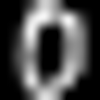

In [ ]:
from PIL import Image
Image.fromarray((data.images[0] / 16 * 255).astype(np.uint8), 'L').resize((100,100)) #reshapar och visulaiserar (tidigare liten bild)

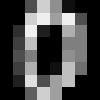

In [ ]:
from PIL import Image
Image.fromarray((data.images[0] / 16 * 255).astype(np.uint8), 'L').resize((100,100), resample = Image.NEAREST) #resamplar med metod nearest

7


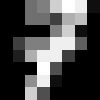

In [ ]:
from PIL import Image

i=7
print(data.target[i])
Image.fromarray((data.images[i] / 16 * 255).astype(np.uint8), 'L').resize((100,100), resample = Image.NEAREST) #reshapar och visulaiserar (tidigare liten bild)

In [ ]:
data.target[0]

0

In [ ]:

np.max(data.images)

16.0

In [ ]:
data.images.reshape((len(data.images), -1)).shape

(1797, 64)

# Train a model
* Perform a dataset split into training data and test data
* Train a SVM calssifier
* Evaluate the classifier

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
flat_dataset = data.images.reshape((len(data.images), -1))
x_train, x_test, y_train, y_test = train_test_split(flat_dataset, data.target, train_size = 0.8) 

In [ ]:
x_test.shape

(360, 64)

In [ ]:
y_test.shape

(360,)

In [ ]:
print(y_train[100])

9


5


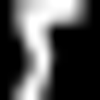

In [ ]:
print(y_test[100])
Image.fromarray((x_test[100].reshape((8,8)) / 16 * 255).astype(np.uint8), 'L').resize((100,100))

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(gamma=0.001)
model.fit(x_train, y_train) #training model

SVC(gamma=0.001)

In [ ]:
model.predict(x_train[0:10]) # model is trained on

array([2, 4, 9, 9, 7, 8, 7, 1, 0, 1])

In [ ]:
y_train[0:10] #it is correct

array([2, 4, 9, 9, 7, 8, 7, 1, 0, 1])

In [ ]:
model.predict(x_test[0:10]) #testar med testsettet

array([1, 5, 9, 9, 5, 1, 1, 0, 9, 3])

In [ ]:
y_test[0:10] #ok, korrekt

array([1, 5, 9, 9, 5, 1, 1, 0, 9, 3])

In [ ]:
from sklearn import metrics 

In [ ]:
predicted = model.predict(x_test)
print(metrics.classification_report(y_test,predicted)) #evaluate model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        27
           3       0.97      0.97      0.97        38
           4       1.00      1.00      1.00        42
           5       0.98      0.98      0.98        41
           6       1.00      1.00      1.00        38
           7       0.98      1.00      0.99        42
           8       1.00      1.00      1.00        19
           9       0.97      0.95      0.96        41

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



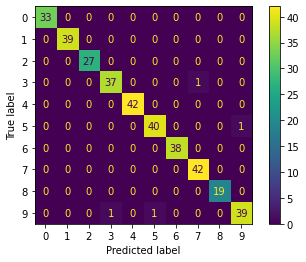

In [ ]:
metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted) #evaluate model

In [ ]:
model

SVC(gamma=0.001)

#Save the model to disk
Save the model persistently so that it can be loaded at a later time in another process for evaluation or inference

In [86]:
import pickle

In [87]:
with open("model.pkl","wb") as fio:
  pickle.dump(model, fio)

In [88]:
with open("model.pkl", "rb") as fio:
  mymodel = pickle.load(fio)

In [89]:
mymodel.predict(x_test[:10]) #använder vå inladdade modell (som är samma som tidigare)

array([1, 5, 9, 9, 5, 1, 1, 0, 9, 3])

In [90]:
y_test[:10] #verifierar med labels

array([1, 5, 9, 9, 5, 1, 1, 0, 9, 3])

In [91]:
Image.open("Egen-3.jpg").resize((8,8)) #öppnar och resizar till vad modellen förväntar

In [114]:
Image.open("Egen-3bv.jpg").resize((8,8)) #öppnar och resizar till vad modellen förväntar

In [143]:
im = Image.open("Egen-3bv.jpg").resize((8,8)) #gör om till 8x8 och sparar som im

In [142]:
np_im.shape

(8, 8, 3)

In [127]:
np_im = np.array(im) #gör till np.array

In [128]:
preprocessed_img = np_im.astype(np.float32) /255*16 #gör om till float och sätter till max 16

In [119]:
preprocessed_img.shape

(8, 8, 3)

In [98]:
preprocessed_img[None].shape

(1, 8, 8, 3)

In [106]:
preprocessed_img.reshape[-1] #samma som flatten

TypeError: ignored

In [120]:
preprocessed_img.flatten().shape #sätter till en dimension

(192,)

In [ ]:
preprocessed_img.flatten()[None].shape #sätter till en dimension

In [131]:
bluech_egen = preprocessed_img[:,:,2] #gör om till svartvit

In [133]:
bluech_egen.shape #nu 8x8, en channel

(8, 8)

In [132]:
Image.fromarray(bluech_egen, "L") #visar bild

In [134]:
processed_bluech_egen = bluech_egen.astype(np.float32) /255*16 #gör om till float och sätter till max 16 för min svartvita

In [135]:
processed_bluech_egen.flatten().shape #sätter till en dimension

(64,)

In [139]:
processed_bluech_egen.flatten().shape

(64,)

In [137]:
processed_bluech_egen.flatten()[None].shape #gör till en lista med 64 (8x8)

(1, 64)

In [140]:
model.predict(processed_bluech_egen.flatten()[None]) #predikterar (fel)

array([1])

TypeError: ignored